# Performing PCA % Kmeans Clustering on Rating Data of TripAdvisor.com

#### Data Source:

https://www.kaggle.com/prashanthv945/travel-reviews

#### From Data Author:

This data set is populated by crawling TripAdvisor.com. Reviews on destinations in 10 categories mentioned across East Asia are considered. Each traveler rating is mapped as Excellent (4), Very Good (3), Average (2), Poor (1), and Terrible (0) and average rating is used against each category per user.
- Attribute 1 : Unique user id
- Attribute 2 : Average user feedback on art galleries
- Attribute 3 : Average user feedback on dance clubs
- Attribute 4 : Average user feedback on juice bars
- Attribute 5 : Average user feedback on restaurants
- Attribute 6 : Average user feedback on museums
- Attribute 7 : Average user feedback on resorts
- Attribute 8 : Average user feedback on parks/picnic spots
- Attribute 9 : Average user feedback on beaches
- Attribute 10 : Average user feedback on theaters
- Attribute 11 : Average user feedback on religious institutions
- Associated Tasks: Classification OR Clustering.

### 1. Let's import some usual libraries and take a look at the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('tripadvisor_review.csv')

In [3]:
data.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


### 2. Drop User ID column since it is unnecessary to be our model feature

In [4]:
data_learn = data.drop(['User ID'],axis=1)

In [5]:
data_learn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 10 columns):
Category 1     980 non-null float64
Category 2     980 non-null float64
Category 3     980 non-null float64
Category 4     980 non-null float64
Category 5     980 non-null float64
Category 6     980 non-null float64
Category 7     980 non-null float64
Category 8     980 non-null float64
Category 9     980 non-null float64
Category 10    980 non-null float64
dtypes: float64(10)
memory usage: 76.7 KB


### 3. Standardize learning data by StandardScaler

Since clustering algorithms including kmeans use distance-based measurements to determine the similarity between data points, it’s recommended to standardize the data to have a mean of zero and a standard deviation of one since almost always the features in any dataset would have different units of measurements such as age vs income.

Reference : https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

In [6]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_learn[data_learn.columns]=std_scaler.fit_transform(data_learn)

In [7]:
data_learn.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02
mean,-3.721513e-17,6.389447e-17,-7.604461e-17,5.140021e-16,-5.437827e-17,1.852260e-16,-1.965290e-14,-1.572665e-15,-2.381315e-16,-9.017730e-16
std,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00
min,-1.693043e+00,-2.829519e+00,-1.120656e+00,-1.368082e+00,-2.012171e+00,-3.157826e+00,-2.677437e+00,-3.020048e+00,-2.275906e+00,-2.052279e+00
25%,-6.830819e-01,-5.702755e-01,-9.430372e-01,-4.381438e-01,-6.855674e-01,-7.100398e-01,-1.200410e-01,-6.916798e-01,-7.118768e-01,-8.070103e-01
50%,-1.934040e-01,-1.518970e-01,-2.452487e-01,-1.162422e-01,-9.088308e-02,-7.954928e-02,-1.200410e-01,-1.095877e-01,-8.077737e-02,-5.984914e-02
75%,3.880885e-01,4.338329e-01,7.094529e-01,1.698925e-01,5.952912e-01,6.622042e-01,-1.200410e-01,5.452658e-01,5.228829e-01,7.495755e-01
max,7.121160e+00,4.784969e+00,3.307129e+00,1.039921e+01,5.398511e+00,3.555043e+00,3.716053e+00,4.037818e+00,4.391797e+00,2.679742e+00


### 4. Do decompositioning by PCA

PCA is a method used to reduce number of variables in your data by extracting important one from a large pool. It reduces the dimension of your data with the aim of retaining as much information as possible. In other words, this method combines highly correlated variables together to form a smaller number of an artificial set of variables which is called “principal components” that account for most variance in the data.

Reference : https://towardsdatascience.com/principal-component-analysis-intro-61f236064b38

In [8]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(data_learn)

pca_2.explained_variance_ratio_.cumsum()

array([0.29775044, 0.42402984])

##### Our PCA can only explained about 42.4% variance

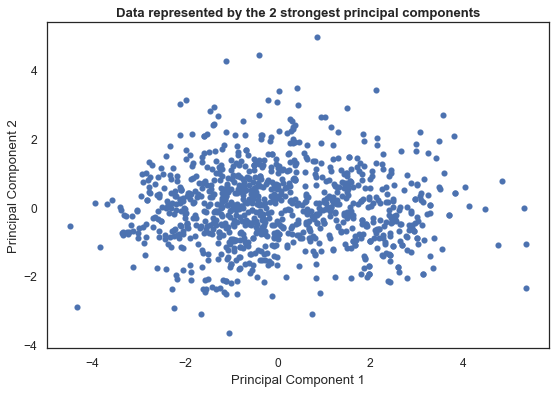

In [9]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1],lw=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
plt.show()

### 5. Now, do modelling with Kmeans and evaluating with its Inertia and silhouette score

In [10]:
from sklearn.cluster import KMeans

inertia = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=101)
    kmeans.fit(data_learn)
    inertia.append(kmeans.inertia_)

In [11]:
from sklearn.metrics import silhouette_score

silhouette = {}
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=101)
    kmeans.fit(data_learn)
    silhouette[i] = silhouette_score(pca_2_result, kmeans.labels_, metric='euclidean')

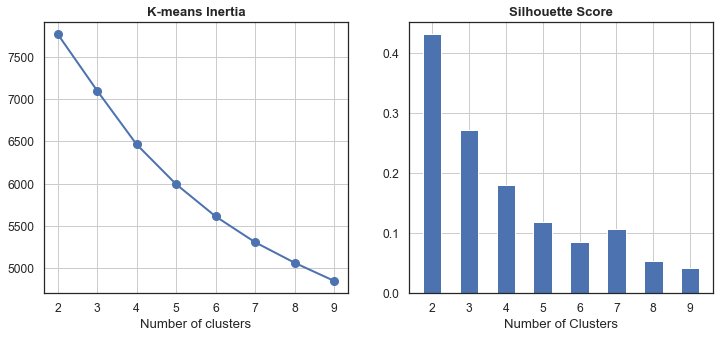

In [12]:
sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})

plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8)
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

##### From both graphs above, We conclude 2 clusters is the best fit on our model.

In [13]:
kmeans = KMeans(n_clusters=2,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=101)
kmeans_labels = kmeans.fit_predict(data_learn)

centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

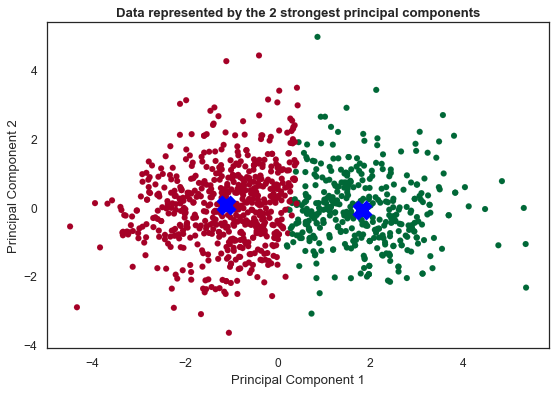

In [14]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1],lw=0.1,c=kmeans_labels,cmap="RdYlGn")
plt.scatter(centroids_pca[:,0],centroids_pca[:,1],c='blue',marker='x',lw=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
plt.show()

### 6. Merge our predicted label in our data

In [15]:
data_end = data.copy()
data_end['Label'] = kmeans_labels
data_end

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Label
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,1
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,1
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,0
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,0
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20,0
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80,0
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02,0
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46,0


### 7. Find some insights

In [16]:
datas = data_end.groupby('Label').mean()
datas

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
Label,,,,,,,,,,
0,0.882690,1.278218,0.590512,0.459785,0.767525,1.591980,3.176914,2.854142,1.575644,2.95769
1,0.910214,1.473155,1.698369,0.650321,1.218770,2.249465,3.187460,2.804144,1.559385,2.54246


In [17]:
datas.T

Label,0,1
Category 1,0.882690,0.910214
Category 2,1.278218,1.473155
Category 3,0.590512,1.698369
Category 4,0.459785,0.650321
Category 5,0.767525,1.218770
Category 6,1.591980,2.249465
Category 7,3.176914,3.187460
Category 8,2.854142,2.804144
Category 9,1.575644,1.559385
Category 10,2.957690,2.542460


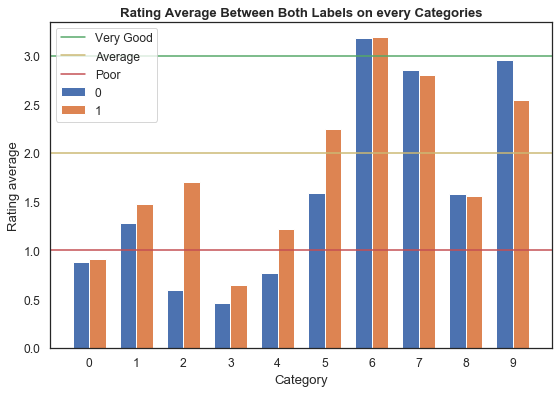

In [18]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

ind = np.arange(len(datas.columns)) 
plt.bar(ind,datas.T[0],0.35,label='0')
plt.bar(ind+0.35,datas.T[1],0.35,label='1')
plt.axhline(y=3, xmin=0.0, xmax=1.0, color='g',label='Very Good')
plt.axhline(y=2, xmin=0.0, xmax=1.0, color='y',label='Average')
plt.axhline(y=1, xmin=0.0, xmax=1.0, color='r',label='Poor')
plt.xlabel('Category')
plt.ylabel('Rating average')
plt.title('Rating Average Between Both Labels on every Categories',fontweight='bold')
plt.xticks(ind + 0.35 / 2, ([i for i in range(len(datas.columns))]))
plt.legend(loc='best')
plt.show()

### 8. Conclussions

Only category 6 (parks/picnic spots) that can be called Very Good destinations. We have to ask users to maintain other destinations.
Focus mainly on the first 5 categories and category 8 (galleries, clubs, bars, restaurants, museums, and theaters).
Especially, labelled 0 users that apparently behind labelled 1 users.

For commercing, focus on recommending category that achieve grade above average (parks/picnic spots, religious institutions, resorts, and beaches)